# 1. Encoding Categorical Features(one hot encoding)

One-Hot Encoding is a widely used technique to convert categorical features into a numerical format that machine learning algorithms can understand. Unlike label encoding, which assigns a single numerical label to each category, one-hot encoding creates new binary (0 or 1) columns for each unique category in the original categorical feature.

How One-Hot Encoding Works:

1. Identify Unique Categories: The algorithm first identifies all the distinct categories present in the categorical column.

2. Create New Binary Columns: For each unique category, a new binary column is created in the dataset. The name of this new column is typically derived from the original feature name and the category name (e.g., Color_Red, Brand_Adidas).

3. Populate Binary Columns: For each row in the original dataset, the newly created binary column corresponding to the category present in that row will have a value of 1, while all other new binary columns (representing other categories of the same original feature) will have a value of 0.

Example (Men's Sports Apparel Colors):

Consider a 'Color' column with categories 'Red', 'Blue', and 'Green'. One-hot encoding would transform this column into three new columns: 'Color_Red', 'Color_Blue', and 'Color_Green'.

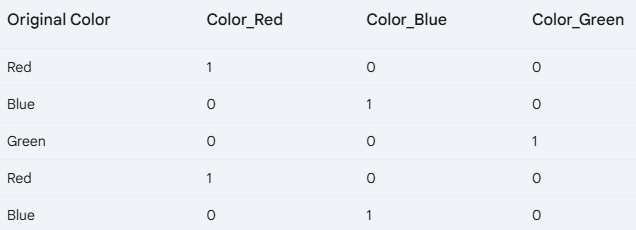

Why Use One-Hot Encoding?

1. Avoids Introducing Ordinality: The primary advantage of one-hot encoding is that it does not impose any artificial order or relationship between the categories, which is crucial for nominal categorical features (where no inherent ranking exists).
2. Suitable for Most Machine Learning Algorithms: Most machine learning algorithms work well with one-hot encoded data, as it treats each category as a separate binary feature.
3. Clear Representation: It provides a clear and unambiguous representation of categorical data in a numerical format.

Considerations and Potential Drawbacks:

1. Increased Dimensionality (Curse of Dimensionality): If a categorical feature has a very large number of unique categories (high cardinality), one-hot encoding can significantly increase the number of features in the dataset. This can lead to the "curse of dimensionality," potentially making models more complex, requiring more data to train effectively, and increasing computational cost.
2. Sparsity: With high cardinality features, the resulting one-hot encoded matrix can be very sparse (containing mostly zeros).
3. Multicollinearity: If you don't drop one of the newly created binary columns for a feature, you can introduce multicollinearity (perfect linear dependency between features), which can be problematic for some linear models. Typically, it's sufficient to keep k-1 binary variables for a categorical feature with k categories. Pandas get_dummies() has a drop_first=True parameter to handle this.

When to Use One-Hot Encoding:

1. Nominal Categorical Features: This is the most common and appropriate use case, where there is no inherent order between the categories (e.g., colors, brands, types of fabric).
2. When the Number of Categories is Not Too Large: To avoid a significant increase in dimensionality.

In summary, one-hot encoding is a powerful and widely used technique for converting nominal categorical features into a numerical format suitable for machine learning by creating binary columns for each category, thus avoiding the introduction of artificial ordinality. However, be mindful of the potential for increased dimensionality with high cardinality features.



# Import necessary dependencies

In [80]:
import pandas as pd

# Create sample dataset

In [81]:
# Sample DataFrame with a categorical feature ('Color' with more categories)
data = pd.DataFrame({
    'Color': ['Navy Blue', 'Grey', 'White', 'Black', 'Red', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink']
})

print("Original Data:")
data

Original Data:


,Color
0,Navy Blue
1,Grey
2,White
3,Black
4,Red
5,Green
6,Yellow
7,Orange
8,Purple
9,Pink


# Categorical Features(one hot encoding) implementation

In [82]:
# Perform one-hot encoding using pandas get_dummies()
data_encoded = pd.get_dummies(data, columns=['Color'] , drop_first=True , dtype='int64')

print("\nData after One-Hot Encoding:")
pd.concat([data , data_encoded] , axis=1)


Data after One-Hot Encoding:


,Color,Color_Green,Color_Grey,Color_Navy Blue,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow
0,Navy Blue,0,0,1,0,0,0,0,0,0
1,Grey,0,1,0,0,0,0,0,0,0
2,White,0,0,0,0,0,0,0,1,0
3,Black,0,0,0,0,0,0,0,0,0
4,Red,0,0,0,0,0,0,1,0,0
5,Green,1,0,0,0,0,0,0,0,0
6,Yellow,0,0,0,0,0,0,0,0,1
7,Orange,0,0,0,1,0,0,0,0,0
8,Purple,0,0,0,0,0,1,0,0,0
9,Pink,0,0,0,0,1,0,0,0,0


The 'Color' column, which has 10 unique categories, will be transformed into 9 new binary columns:  'Color_Blue' (from 'Navy Blue'), 'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_White', and 'Color_Yellow' since we used drop_first=True

One-hot encoding is a valuable technique for converting nominal categorical features into a numerical format without introducing artificial order. However, when dealing with features that have many unique categories, it's important to be aware of the potential for increased dimensionality and sparsity. In such cases, consider alternative strategies to manage the number of features while still capturing the information from the categorical variable.